In [26]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

## Testing for baseline values

In [27]:
employee = pd.read_csv("../data/employee_cleaned.csv")

## Partition Data prior to testing baseline model

In [28]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
y = employee.loc[:, employee.columns == 'LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

## Initializing Dummy Classifier

Strategy implemented for this project is the uniform approach:
“uniform”: generates predictions uniformly at random from the list of unique classes observed in y_train, i.e. each class has equal probability.
Random State set to 7 for reproducibility

In [29]:
dummy_clf = DummyClassifier(strategy='uniform', random_state = 7)
dummy_clf.fit(X_train,y_train.values.ravel())

DummyClassifier(random_state=7, strategy='uniform')

## Storing predicted results for baseline metrics

In [30]:
# Check for Model Accuracy
y_pred = dummy_clf.predict(X_test)

## Evaluating metrics

In [31]:
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames=['Actual'], colnames=['Predicted'])
ypred['Total'] = ypred.sum(axis=1);
ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          338  312    650
1          224  232    456
Total      562  544   1106


In [32]:
TP = ypred[1][1]
TN = ypred[0][0]
FP = ypred[1][0]
FN = ypred[0][1]
TAN = TN + FP
TAP = FN + TP
TPN = TN + FN
TPP = FP + TP
GT = ypred['Total']['Total']

In [33]:
from tabulate import tabulate

In [34]:
accuracy = round((TN + TP) / GT, 4)
sensitivity = round(TP / TAP, 4)
specificity = round(TN / TAN, 4)
precision = round(TP / TPP, 4)
recall = round(TP / (TP + FN), 4)
pxr = precision * recall
ppr = precision + recall
F1 = round((pxr / ppr) * 2, 4)
F2 = round((pxr / ((4 * precision) + recall)) * 5, 4)
F05 = round((pxr / ((0.25 * precision) + recall)) * 1.25, 4)

In [35]:
data = [["Accuracy", "(TN+TP)/GT", accuracy], ["Error rate", "1-Accuracy", 1 - accuracy],
        ["Sensitivity = Recall", "TP/TAP", sensitivity], ["Specificity", "TN/TAN", specificity],
        ["Precision", "TP/TPP", precision], ["F1", "2*(precision*recall)/(precision+recall)", F1],
        ["F2", "5*(precision*recall)/((4*precision)+recall)", F2],
        ["F0.5", "1.25*(precision*recall)/((0.25*precision)+recall)", F05]]
col_names = ["Evaluation Measure", "Formula", "Value"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════╤═══════════════════════════════════════════════════╤═════════╕
│ Evaluation Measure   │ Formula                                           │   Value │
╞══════════════════════╪═══════════════════════════════════════════════════╪═════════╡
│ Accuracy             │ (TN+TP)/GT                                        │  0.5154 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Error rate           │ 1-Accuracy                                        │  0.4846 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Sensitivity = Recall │ TP/TAP                                            │  0.5088 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Specificity          │ TN/TAN                                            │  0.52   │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Precision            │ TP/TPP            

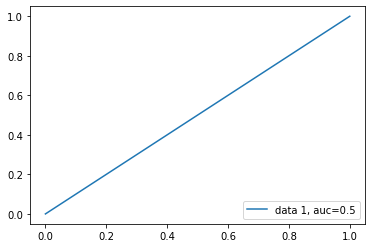